In [385]:
import importlib
import helper, consts
importlib.reload(consts)
importlib.reload(helper)

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [386]:
TEST_DATE = "20211201"
FILE_PATH = "../Data/"

In [393]:
data = helper.Data(train_data_path=FILE_PATH)

In [394]:
train_df = data.update_and_get_train_df(TEST_DATE, backward_dayCount = 1)
train_df.shape

Getting files from 2021-11-29 00:00:00 to 2021-11-30 00:00:00, inclusive.
Filtered File Dates: ['data.20211129_1200', 'data.20211130_1200']



(7278, 251)

In [395]:
test_dfs = data.update_and_get_test_df(data_path=FILE_PATH, start_date=TEST_DATE)

Getting files from 2021-12-01 00:00:00 to 2021-12-01 00:00:00, inclusive.
Filtered File Dates: ['data.20211201_1200']



In [396]:
test_df = data.test_dfs[0]
test_df.shape

(3638, 251)

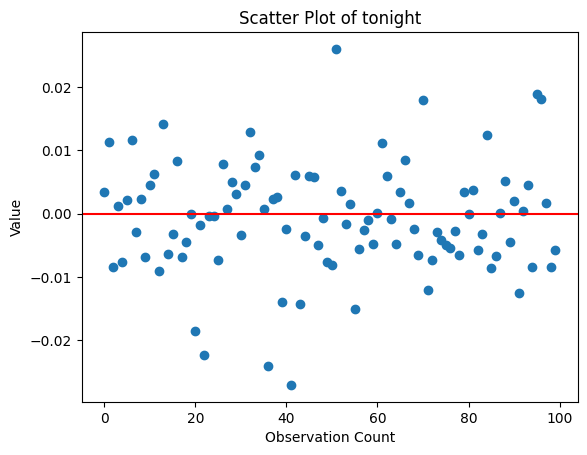

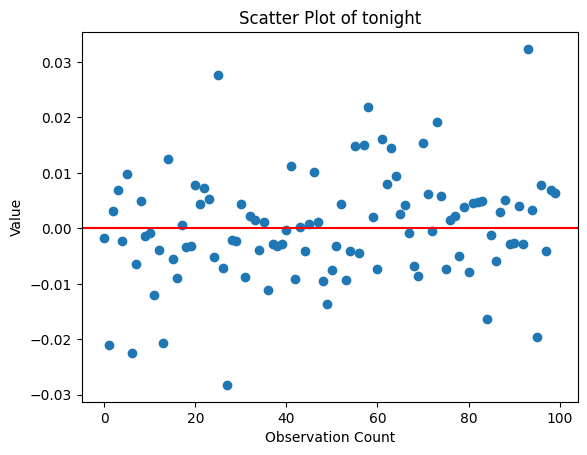

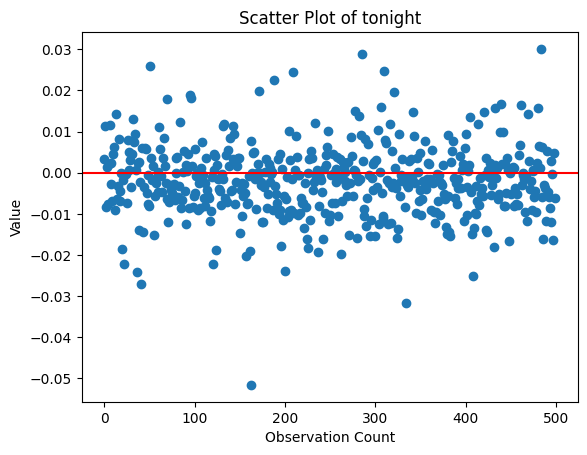

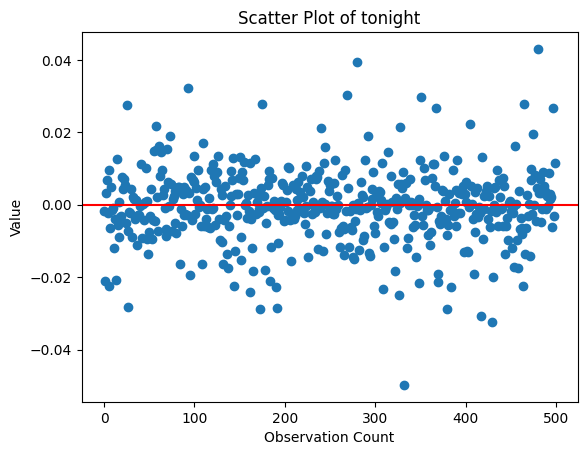

In [397]:
helper.scatter_lot(train_df, consts.RESPONSE_NAME, 100)
helper.scatter_lot(test_df, consts.RESPONSE_NAME, 100)
helper.scatter_lot(train_df, consts.RESPONSE_NAME, 500)
helper.scatter_lot(test_df, consts.RESPONSE_NAME, 500)

In [399]:
model1 = helper.Model('OLS')
model1.train(train_df)
model1.test(test_df)

You're using: OLS.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
No. features being used: 250
response_corr: 0.9123763551745273
mean_return: 0.009809597031335899
scale_factor: 0.9979035248454443


Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Filtered File Dates: ['data.20211101_1200', 'data.20211102_1200', 'data.20211103_1200', 'data.20211104_1200', 'data.20211105_1200', 'data.20211108_1200', 'data.20211109_1200', 'data.20211110_1200', 'data.20211111_1200', 'data.20211112_1200', 'data.20211115_1200', 'data.20211116_1200', 'data.20211117_1200', 'data.20211118_1200', 'data.20211119_1200', 'data.20211122_1200', 'data.20211123_1200', 'data.20211124_1200', 'data.20211126_1200', 'data.20211129_1200', 'data.20211130_1200']

Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.
Filtered File Dates: ['data.20211201_1200', 'data.20211202_1200', 'data.20211203_1200', 'data.20211206_1200', 'data.20211207_1200', 'data.20211208_1200', 'data.20211209_1200', 'data.20211210_1200', 'data.20211213_1200', 'data.20211214_1200', 'data.20211215_1200', 'data.20211216_1200']



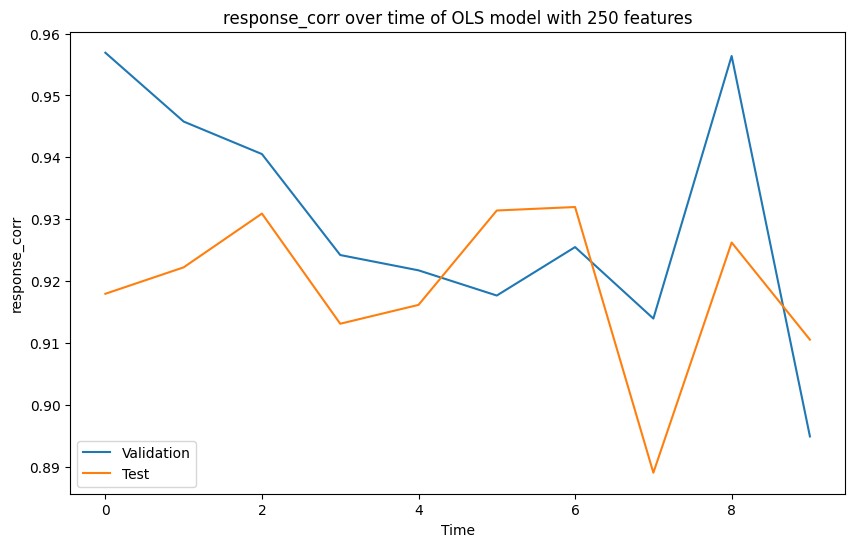

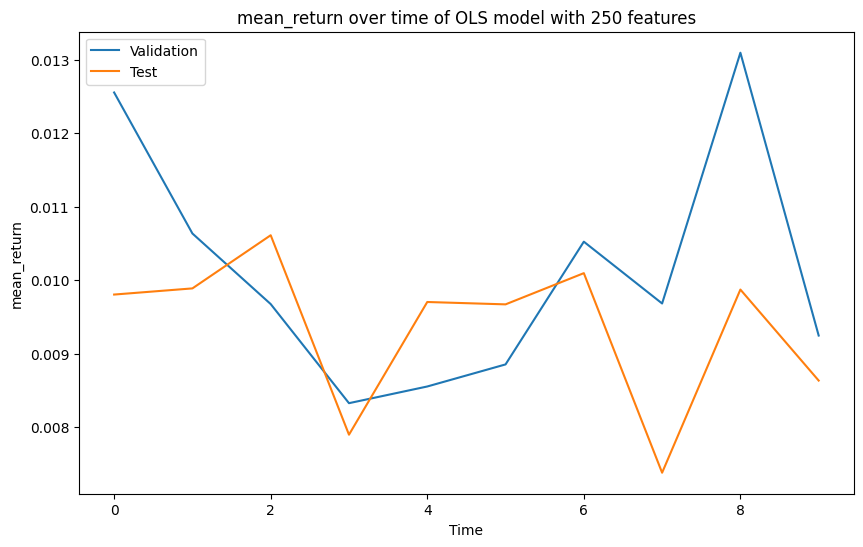

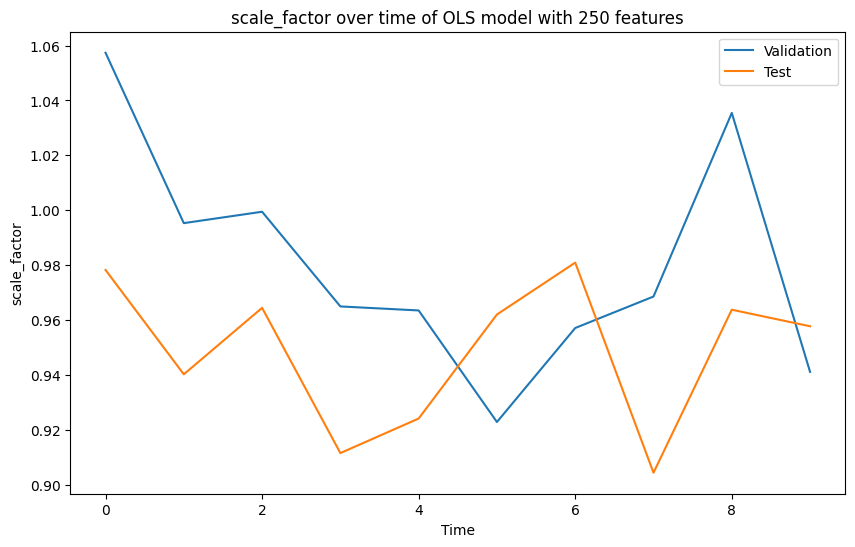

In [400]:
helper.validation_plot(data, model1, 10, "20211201", train_data_count=30, data_path=FILE_PATH, forward_dayCount = 15)

In [401]:
features = helper.stepwise_selection(X = train_df.drop(consts.RESPONSE_NAME, 
                                                       inplace=False, axis = consts.COL),
                                    y = train_df[consts.RESPONSE_NAME])

Add dn1                            with p-value 0.0
Add tmwam                          with p-value 0.0
Add today                          with p-value 0.0
Add cftorrrelstd_open_0            with p-value 1.78953e-40
Add llirpnxm_toxhr_0               with p-value 8.10786e-27
Add totrisklog_open_0              with p-value 8.12846e-19
Add llirpnxm_lst15_0               with p-value 1.61661e-14
Add llirpnxm_dy_7to11              with p-value 1.84316e-13
Add dn4x1                          with p-value 5.43184e-14
Add dn3sttmwmd                     with p-value 0.0
Add llirpnxm_dy_4to6               with p-value 4.92464e-10
Add tr_nt_1                        with p-value 7.45872e-08
Add rvdelta_pm_1                   with p-value 9.09413e-08
Add relvol_nt_17to21               with p-value 4.07765e-07
Add rrirpnxm_am_1                  with p-value 7.41068e-06
Add relvol_lst15_0                 with p-value 7.78159e-06
Add nnetticksrelmultstdev_toxhr_0  with p-value 2.3647e-05
Add rrretstr_

In [402]:
model2 = helper.Model('OLS')
model2.train(train_df, feature_col_names = features)
model2.test(test_df)

You're using: OLS.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
No. features being used: 35
response_corr: 0.9174275510646646
mean_return: 0.00981392193512919
scale_factor: 1.007845780639972


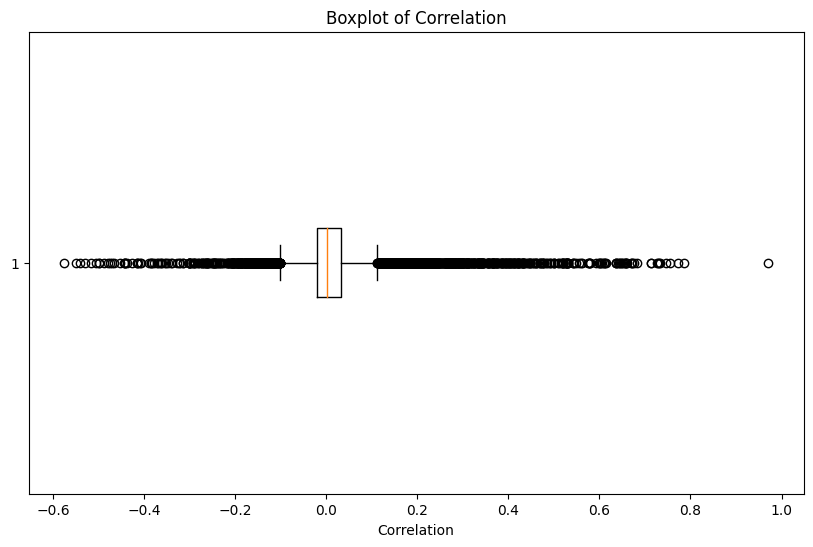

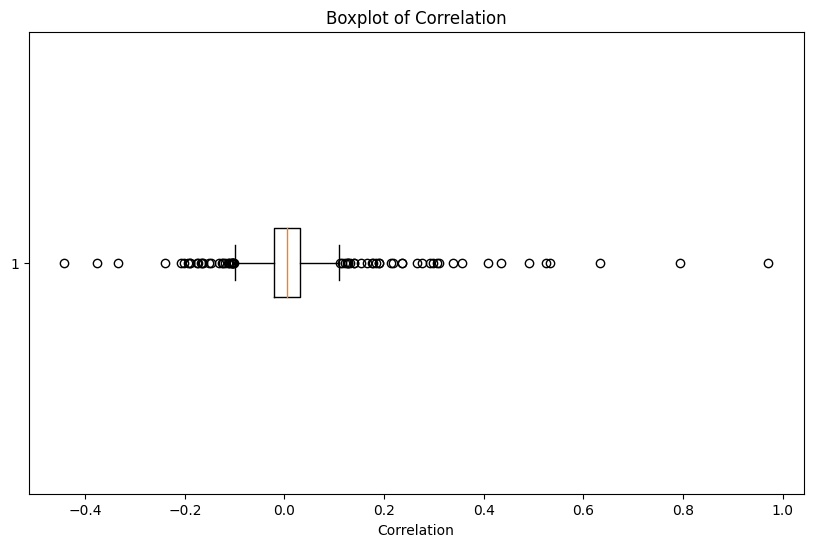

In [403]:
helper.boxplot(helper.get_correlations(train_df[filtered_features]), 'Correlation')
helper.boxplot(helper.get_correlations(train_df[features]), 'Correlation')

In [405]:
filtered_features_full = helper.LASSO_feature_selection(train_df)
filtered_features_stepwise = helper.LASSO_feature_selection(train_df, features=features)

You're using: LASSO.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'alphas': None, 'copy_X': True, 'cv': None, 'eps': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'n_alphas': 100, 'n_jobs': None, 'positive': False, 'precompute': 'auto', 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': False}
No. features being used: 250
response_corr: 0.9172761580823797
mean_return: 0.009832345244639912
scale_factor: 1.0433209820972529
You're using: LASSO.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'alphas': None, 'copy_X': True, 'cv': None, 'eps': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'n_alphas': 100, 'n_jobs': None, 'positive': False, 'precompute': 'auto', 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': False}
No. features being used: 35
response_corr: 0.9206179289593562
mean_return: 0.009898279824079164
scal

In [406]:
model4 = helper.Model('OLS')
model4.train(train_df, feature_col_names = filtered_features)
model4.test(test_df)

You're using: OLS.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
No. features being used: 150
response_corr: 0.9186905379758886
mean_return: 0.009879129741616274
scale_factor: 0.9920788842793304


In [407]:
model5 = helper.Model('OLS')
model5.train(train_df, feature_col_names = features)
model5.test(test_df)

You're using: OLS.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
No. features being used: 35
response_corr: 0.9174275510646646
mean_return: 0.00981392193512919
scale_factor: 1.007845780639972


Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Filtered File Dates: ['data.20211101_1200', 'data.20211102_1200', 'data.20211103_1200', 'data.20211104_1200', 'data.20211105_1200', 'data.20211108_1200', 'data.20211109_1200', 'data.20211110_1200', 'data.20211111_1200', 'data.20211112_1200', 'data.20211115_1200', 'data.20211116_1200', 'data.20211117_1200', 'data.20211118_1200', 'data.20211119_1200', 'data.20211122_1200', 'data.20211123_1200', 'data.20211124_1200', 'data.20211126_1200', 'data.20211129_1200', 'data.20211130_1200']

Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.
Filtered File Dates: ['data.20211201_1200', 'data.20211202_1200', 'data.20211203_1200', 'data.20211206_1200', 'data.20211207_1200', 'data.20211208_1200', 'data.20211209_1200', 'data.20211210_1200', 'data.20211213_1200', 'data.20211214_1200', 'data.20211215_1200', 'data.20211216_1200']



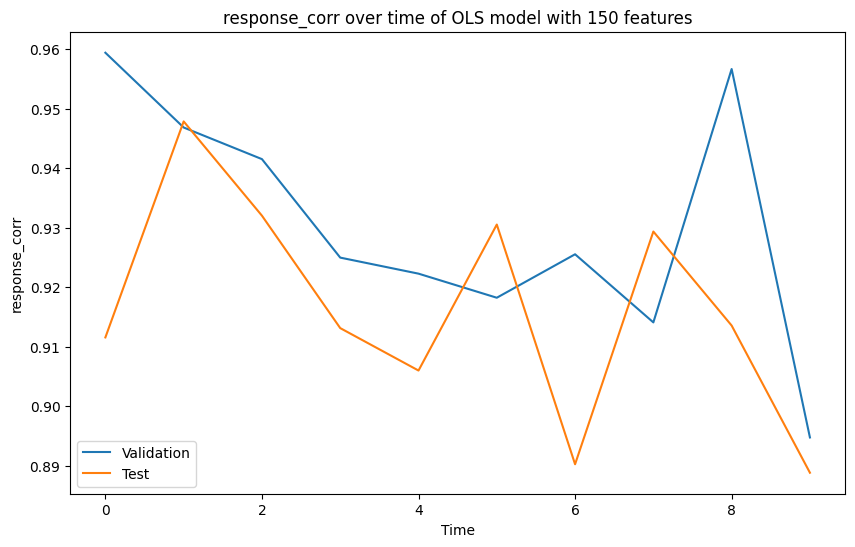

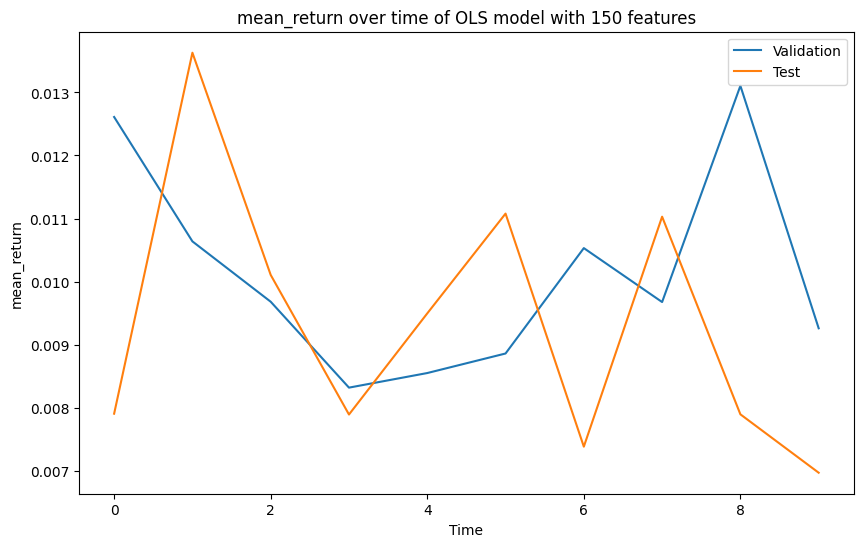

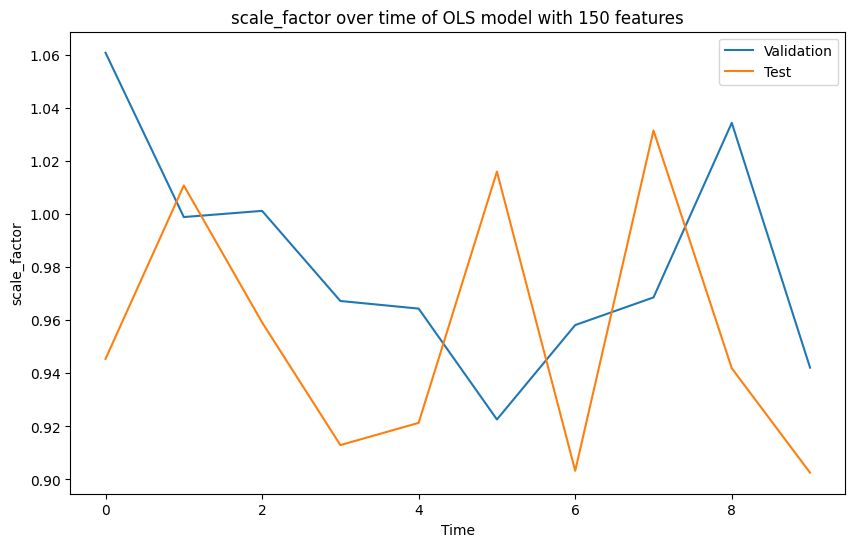

In [423]:
helper.validation_plot(data, model4, 10, "20211201", train_data_count=30, data_path=FILE_PATH, forward_dayCount = 15,
                        features = filtered_features)

Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Filtered File Dates: ['data.20211101_1200', 'data.20211102_1200', 'data.20211103_1200', 'data.20211104_1200', 'data.20211105_1200', 'data.20211108_1200', 'data.20211109_1200', 'data.20211110_1200', 'data.20211111_1200', 'data.20211112_1200', 'data.20211115_1200', 'data.20211116_1200', 'data.20211117_1200', 'data.20211118_1200', 'data.20211119_1200', 'data.20211122_1200', 'data.20211123_1200', 'data.20211124_1200', 'data.20211126_1200', 'data.20211129_1200', 'data.20211130_1200']

Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.
Filtered File Dates: ['data.20211201_1200', 'data.20211202_1200', 'data.20211203_1200', 'data.20211206_1200', 'data.20211207_1200', 'data.20211208_1200', 'data.20211209_1200', 'data.20211210_1200', 'data.20211213_1200', 'data.20211214_1200', 'data.20211215_1200', 'data.20211216_1200']



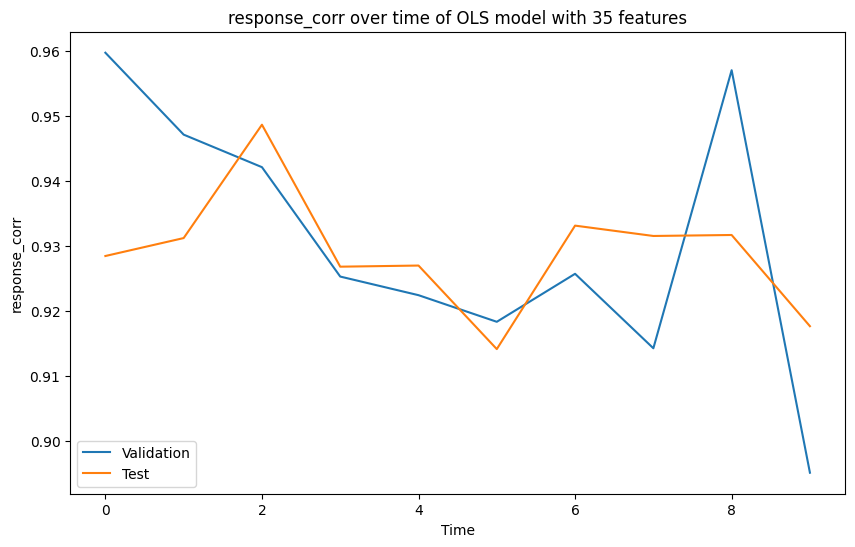

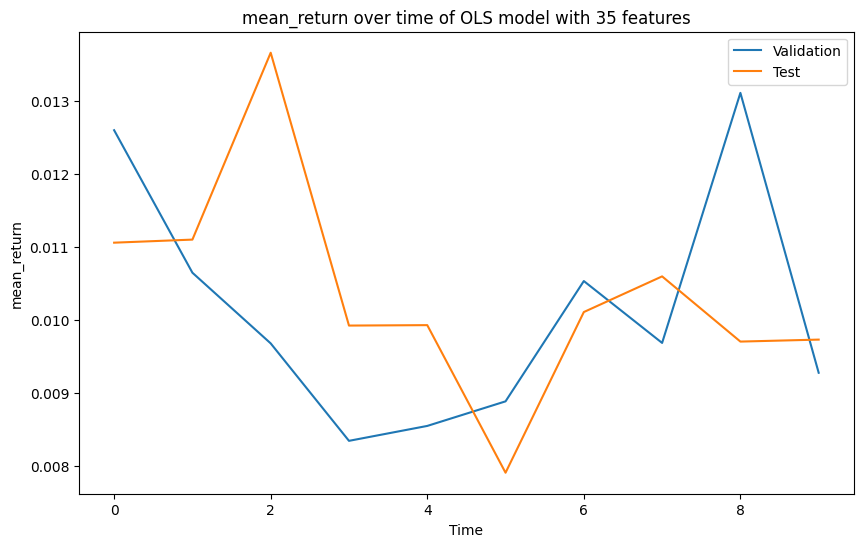

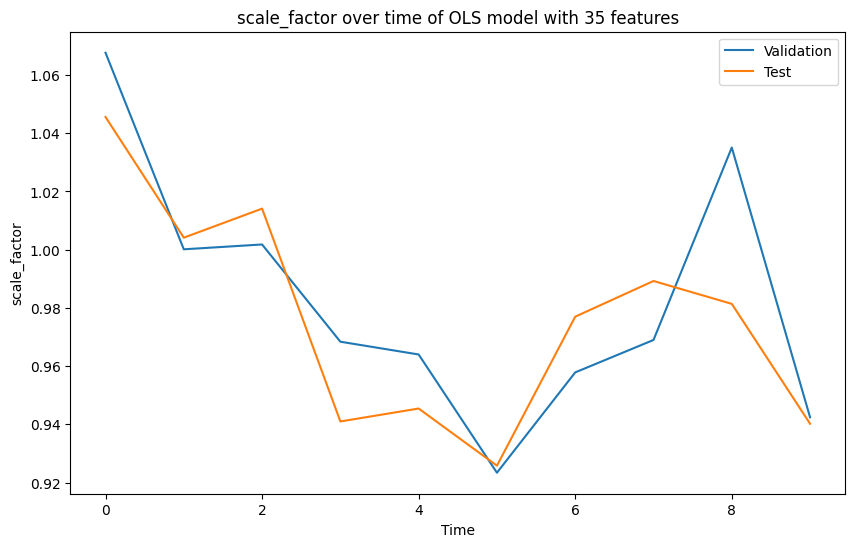

In [424]:
helper.validation_plot(data, model5, 10, "20211201", train_data_count=30, 
                        data_path=FILE_PATH, forward_dayCount = 15, features = features)

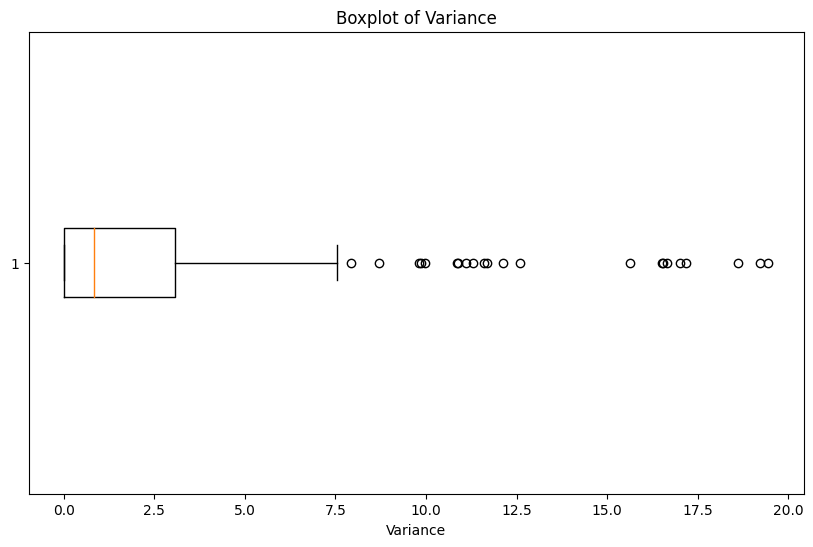

In [410]:
helper.boxplot(helper.get_variances(train_df), 'Variance')

In [438]:
export_path = "C:/Users/hoang/OneDrive/Desktop/Clinic/presentation/Hoang/Hoang_features.txt"
helper.extract_features_to_file(features, export_path)